# Box Plot

# Box Plots <a id="8"></a>

A `box plot` es una manera de estadísticamente representar la distribución de la data en 5 dimensiones:

-   **Mínimo:** El número más pequeño en la base.
-   **Primer cuartil:** Número del medio entre el `mínimo` y la `media`.
-   **Segundo cuartil (Media):** El número del medio dentro de una base ordenada de menor a mayor.
-   **Tercer cuartil:** Número del medio entre el `media` y la `máximo`..
-   **Máximo:** El número máximo de la base.

<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Images/boxplot_complete.png" width=440, align="center">

Para crear un `box plot`, usamos `kind=box` en `plot` método invocado en pandas series o en dataframe.

### Cargamos la base de datos

In [23]:
import pandas as pd
import numpy as np

In [24]:
path='C:\\Users\\Gabo\\Documents\\Gabriel Mendoza\\Business\\Crehana\\El ABC de Jupyter Notebook y Anaconda\\Material\\04 Módulo 4\\Clase 17\\Facturación.xlsx'

In [25]:
df=pd.read_excel(path)

In [26]:
df

,Factura,Fecha de Emision,Fecha de Pago,No. cliente,Cliente,Vendedor,Costo,Importe Factura,Importe Pagado,% Comision Vendedor
0,FACT2000,2020-01-06,2020-01-30,208,CC208208208,Juan,163.087778,220.705333,218.825386,0.0225
1,FACT2001,2020-01-07,2020-02-19,45,CC454545,Juan,947.945333,1181.498667,1166.952107,0.0150
2,FACT2002,2020-01-08,2020-02-17,268,CC268268268,Juan,4.201185,13.438222,12.766284,0.0225
3,FACT2003,2020-01-08,2020-02-07,157,CC157157157,Juan,86.481778,99.466667,99.466667,0.0125
4,FACT2004,2020-01-09,NaT,157,CC157157157,Juan,32.000000,38.666667,NaN,0.0000
...,...,...,...,...,...,...,...,...,...,...
504,FACT2550,2020-06-05,2020-06-02,159,CC159159159,Bety,276.158222,406.222222,406.222222,0.0225
505,FACT2551,2020-06-12,2020-06-15,176,CC176176176,Bety,1138.454179,1560.793778,1554.495120,0.0225
506,FACT2552,2020-06-18,2020-06-22,305,CC305305305,Bety,360.347111,409.920889,416.392000,0.0100
507,FACT2553,2020-06-19,2020-06-18,305,CC305305305,Bety,382.431461,453.180889,223.278073,0.0125


#### Objetivo: conocer la distribución del importe factura

### Primero se prepara la base de datos

In [27]:
#Vamos a querer únicamente nuestro importe factura
df_box=df[['Fecha de Emision','Importe Factura']]

In [28]:
df_box.head()

,Fecha de Emision,Importe Factura
0,2020-01-06,220.705333
1,2020-01-07,1181.498667
2,2020-01-08,13.438222
3,2020-01-08,99.466667
4,2020-01-09,38.666667


In [29]:
df_box.set_index('Fecha de Emision', inplace=True)

### Graficamos el boxplot

In [30]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

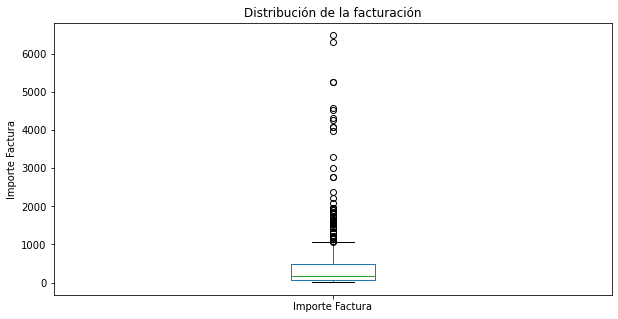

In [31]:
df_box.plot(kind='box', figsize=(10,5))

plt.ylabel('Importe Factura')
plt.title('Distribución de la facturación')


plt.show()

In [32]:
df_box.describe()

,Importe Factura
count,509.000000
mean,467.890891
std,827.004190
min,3.828000
25%,79.955556
50%,173.333333
75%,475.555556
max,6488.888889


Observamos que tenemos muchos outliers, tanto en la gráfica como en las estadísticas descriptivas.
Por lo tanto limpiaremos la base de datos pidiéndole que solo nos arroje el 95% de la data

In [37]:
# Quitaremos los outliers de la variable
#Por esto tomamos el quantile 95%
q = df_box['Importe Factura'].quantile(0.95) # intentar hasta 85 y ver cambios en la gráfica
df2= df_box[df_box['Importe Factura']<q]

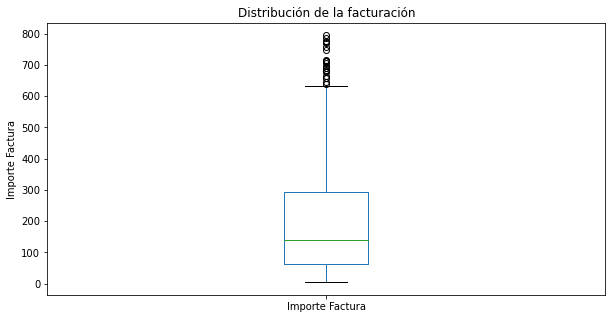

In [38]:
df2.plot(kind='box', figsize=(10,5))

plt.ylabel('Importe Factura')
plt.title('Distribución de la facturación')


plt.show()